In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
sns.set(style="darkgrid")
url = 'https://raw.githubusercontent.com/vindosVP/kzlab4/main/cwurData.csv'
data = pd.read_csv(url)
data.tail()


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015
2199,1000,China Pharmaceutical University,China,83,367,567,218,861,991,812,981.0,547,44.02,2015


In [29]:
# 2. Сделать препроцессинг, фичеинжинириг и т.д. \\ разрешается использование любых пакетов
data.isna().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [30]:
categorical = list(data.dtypes[data.dtypes == "object"].index)
a = data[categorical]
a = pd.get_dummies(a)

def split(a):
    if np.isnan(a)==True:
            return 0
    else:
        return a
    
data = data.drop(columns=categorical)
data = data.join(a)

In [31]:
y = data["score"]
X = data.drop(columns=["score","influence"])

from sklearn.model_selection import train_test_split

num_f = data.select_dtypes(include=np.number).columns.tolist()
X1 = data[num_f]
num_f = X1.columns
X1 = X1.fillna(method='bfill')
X1.isna().mean()

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=10)

In [32]:
for i in list(X_train.columns):
    y_train = y_train.agg(split)
    y_test = y_test.agg(split)
    X_test[i] = X_test[i].agg(split)
    X_train[i] = X_train[i].agg(split)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

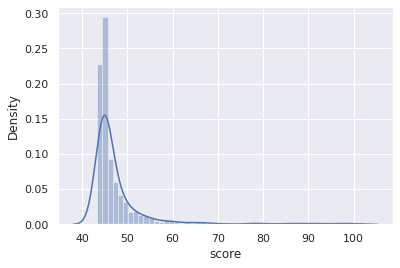

In [34]:
# 2*. Посчитать различные статистики, визуализировать данные и сделать первичные выводы \\ разрешается использование любых пакетов
sns.distplot(y_train)

In [35]:
# p2
def r2(r, p):
    Sum1 = np.sum((p - r) ** 2)
    Sum2 = np.sum((r - np.mean(r)) ** 2)

    r2 = 1 - Sum1 / Sum2

    return r2

In [36]:
# 4. Реализовать и обучить логистическую регрессию или линейную регрессию \\ !!!не разрешается использовать sklearn!!!
def predict_y(x, w, b):
    return w*x + b

def cost_function(x, y, w, b):
    companies = len(x)
    total_error = 0.0
    for i in range(companies):
        total_error += (y[i] - (w*x[i] + b))**2
    return total_error / companies

In [37]:
def update(x, y, w, b, rate):
    w_deriv = 0
    b_deriv = 0
    companies = len(x)

    for i in range(companies):
        # Вычисление частных производных
        # -2x(y - (mx + b))
        w_deriv += -2*x[i] * (y[i] - (w*x[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(y[i] - (w*x[i] + b))

    # Мы вычитаем, потому что производные указывают в направлении самого крутого подъема
    w -= (w_deriv / companies) * rate
    b -= (b_deriv / companies) * rate

    return w, b

In [38]:
def train(x, y, w, b, rate, iters):
    cost_history = []

    for i in range(iters):
        w,b = update(x, y, w, b, rate)

        #Calculate cost for auditing purposes
        cost = cost_function(x, y, w, b)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter={}    weight={}    bias={}    cost={}".format(i, w, b, cost))
            

    return w, b, cost_history, score

In [42]:
x = X_train_sc
y = y_train.values
for i in range(len(x)):
    for k in range(len(x[i])):
        if np.isnan(x[i][k])==True:
            x[i][k]=0
for i in range(len(y)):
    if np.isnan(y[i])==True:
            y[i]=0
weight = 0 # веса
bias = 0 # сдвиг
lr = 0.01 # качество обучения
iters = 100 # итерации
score = [] # оценка
w, b, cost_history, score = train(x,y,weight,bias,lr,iters)

iter=0    weight=[ 0.00093148 -0.0093311  -0.00203402 ... -0.00120547  0.00093929
 -0.00261905]    bias=[0.95682857 0.95682857 0.95682857 ... 0.95682857 0.95682857 0.95682857]    cost=[2259.34584468 2259.33731069 2259.34552099 ... 2259.34578671 2259.34584323
 2259.34525149]
iter=10    weight=[ 0.00928075 -0.09296983 -0.02026578 ... -0.01201057  0.00935854
 -0.02609476]    bias=[9.53329685 9.53329685 9.53329685 ... 9.53329685 9.53329685 9.53329685]    cost=[1528.69239108 1528.6150617  1528.68945804 ... 1528.69186585 1528.69237797
 1528.68701601]
iter=20    weight=[ 0.01610271 -0.16130875 -0.03516246 ... -0.02083913  0.01623768
 -0.04527612]    bias=[16.54089586 16.54089586 16.54089586 ... 16.54089586 16.54089586
 16.54089586]    cost=[1040.90232086 1040.77906314 1040.8976458  ... 1040.90148369 1040.90229998
 1040.89375337]
iter=30    weight=[ 0.02167675 -0.21714663 -0.04733413 ... -0.0280527   0.02185844
 -0.06094869]    bias=[22.26661445 22.26661445 22.26661445 ... 22.26661445 22.26661

In [ ]:
# 4*. Добавить регуляризацию \\ не разрешается использовать sklearn

In [43]:
# 5. Оценить качество модели на обучающей и тестовой выборках \\ не разрешается использовать sklearn
x = X_test_scaled
y = y_test.values
for i in range(len(x)):
    for k in range(len(x[i])):
        if np.isnan(x[i][k])==True:
            x[i][k]=0
for i in range(len(y)):
    if np.isnan(y[i])==True:
            y[i]=0
predict_y (x, w, b)

array([[41.44945781, 41.79328246, 41.56022285, ..., 41.49848292,
        41.48615066, 41.50055071],
       [41.52410774, 41.65471761, 41.42924338, ..., 41.49848292,
        41.48615066, 41.50055071],
       [41.53477201, 41.55464299, 41.42924338, ..., 41.49848292,
        41.48615066, 41.50055071],
       ...,
       [41.53783799, 41.40068205, 41.42924338, ..., 41.49848292,
        41.48615066, 41.50055071],
       [41.53783799, 41.59313323, 41.43787939, ..., 41.49848292,
        41.48615066, 41.50055071],
       [41.51650944, 41.67781175, 41.42924338, ..., 41.49848292,
        41.48615066, 41.50055071]])

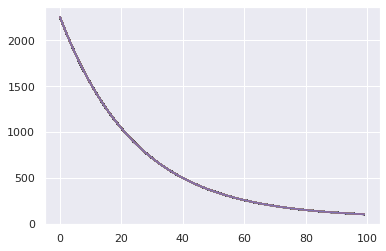

In [44]:
# 5*. Сделать график ошибки модели на обучающей и тестовой выборках 
# 5*. Сделать график точности модели на обучающей и тестовой выборках
plt.plot(cost_history)
plt.grid(True)
plt.show()

In [45]:
# 6. Обучить логистическую регрессию или линейную регрессию из sklearn, оценить качество модели на 
# обучающей и тестовой выборках и сравнить со своей моделью
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lr = linear_model.LinearRegression()
lr.fit(X_train_scaled, y_train)
print ("LinearRegression:", lr.score(X_test_scaled, y_test))
print ("LR RMSE:", np.sqrt(mean_squared_error(lr.predict(X_test_scaled), y_test)))

LinearRegression: 0.999628518532785
LR RMSE: 0.13972835555859478


In [ ]:
# 6*. Сделать график ошибки модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью
# 6*. Сделать график точности модели из sklearn на обучающей и тестовой выборках и сравнить со своей моделью

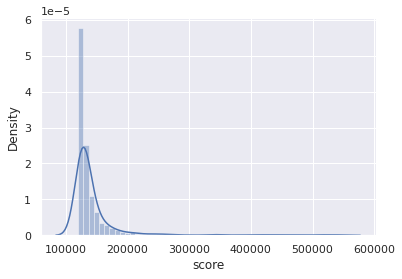

In [46]:
error = (y_train - lr.predict(X_train)) ** 2
sns.distplot(error)

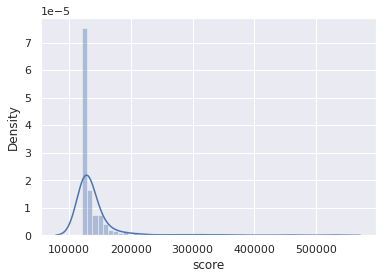

In [47]:
error = (y_test - lr.predict(X_test)) ** 2
sns.distplot(error)